In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import scipy
from scipy.linalg import solve
import scipy.stats as sts

# Генерация точек Экспоненциального распределения
- генерация списка x
- создание случайной величины из Экспоненциального распределения из модуля stats
- генерация 1000 samples
- генерация теоритического распределения

In [13]:
x = np.linspace(0, 10, 100)
lambda_ = 1

expon_rv = sts.expon(0, lambda_)
sample = expon_rv.rvs(1000)
pdf = expon_rv.pdf(x)

# Отрисовка распределения и гистограммы на одном графике

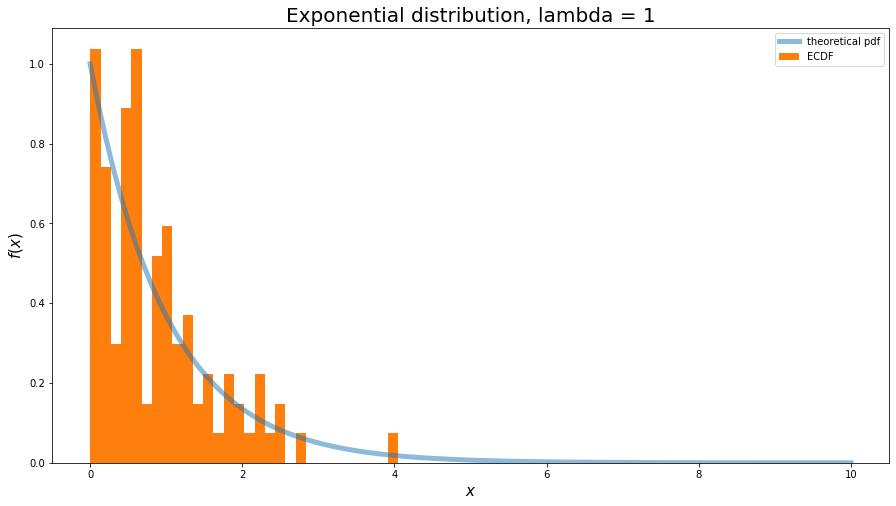

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5, lw=5)
plt.hist(sample, density=True, bins=30, label='ECDF')
plt.legend()
plt.title('Exponential distribution, lambda = 1', fontsize=20)
plt.ylabel('$f(x)$', fontsize=15)
plt.xlabel('$x$', fontsize=15);

# Построение распределения выборочного среднего
- n принимает значения 5, 10, 50, 100
- генерируем 1000 выборок с раздичными n и считаем среднее
- создаем случайную величину из нормального распределения с параметрами Ex = 1/lambda_, Dx = 1/(lambda_**2) (теория) Дисперсию берем выборочную, то есть делим на n

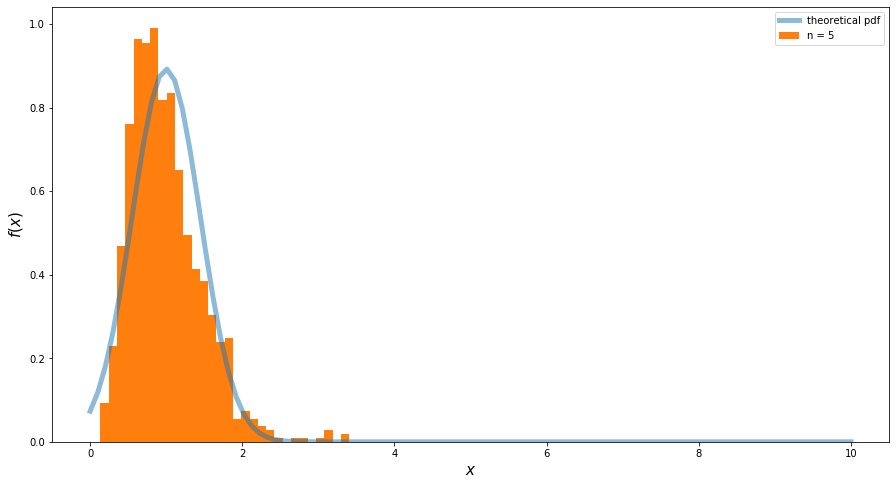

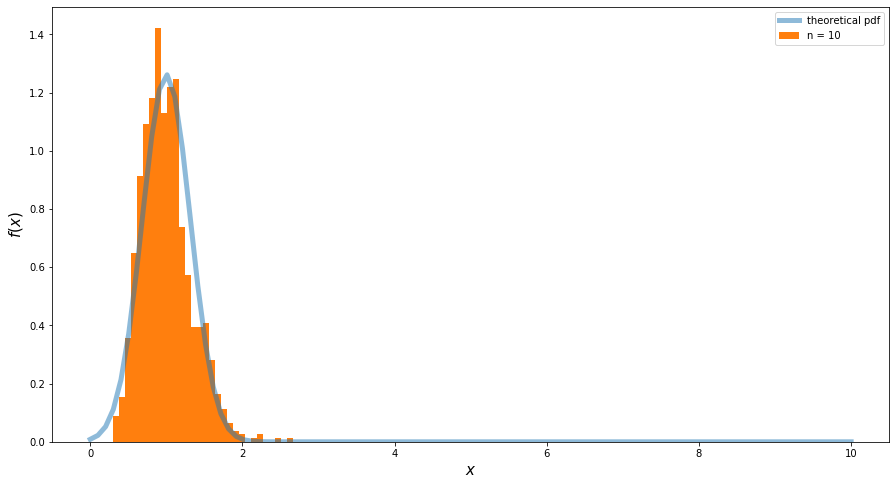

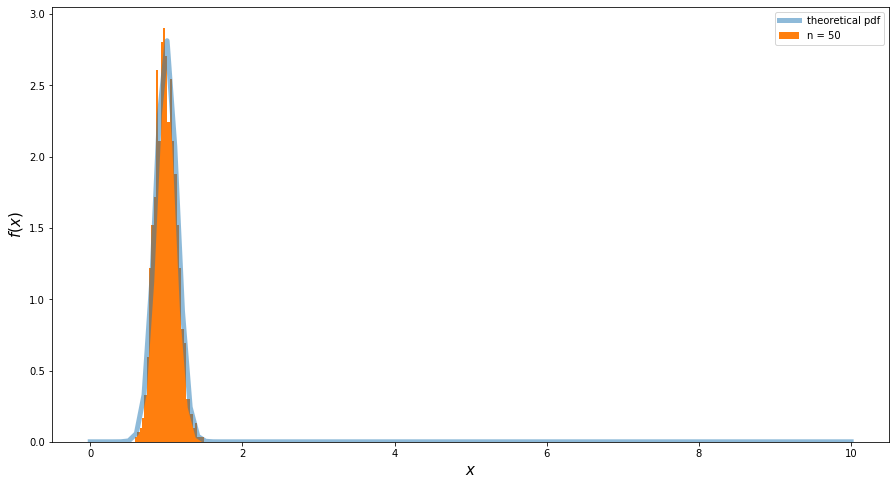

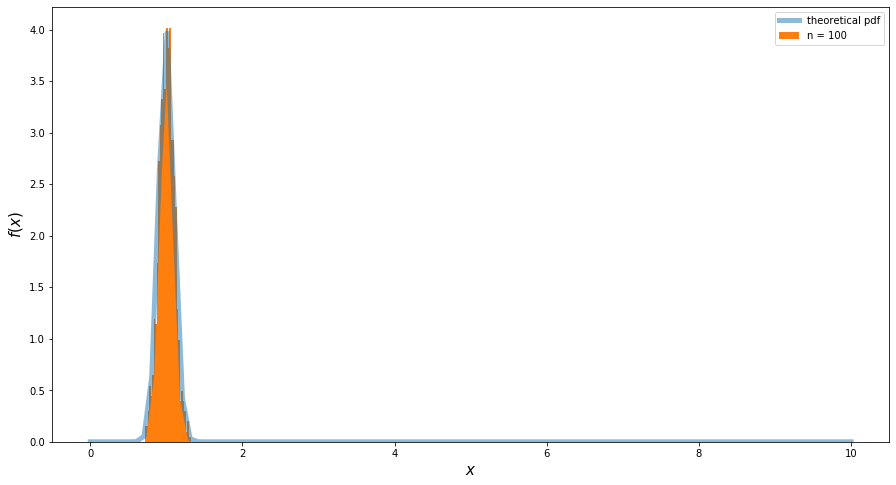

In [20]:
for n in [5, 10, 50, 100]:
    sample_n = []
    for _ in range(1000):
        sample = expon_rv.rvs(n)
        sample_n.append(np.mean(sample))
        
    norm_rv = sts.norm(loc=1/lambda_, scale=1/np.sqrt(((lambda_)**2) * n))
    norm_pdf = norm_rv.pdf(x)
    
    plt.figure(figsize=(15, 8))
    plt.plot(x, norm_pdf, label='theoretical pdf', lw=5, alpha=0.5)
    plt.hist(sample_n, density=True, bins=30, label='n = '+str(n))
    plt.legend()
    plt.ylabel('$f(x)$', fontsize=15)
    plt.xlabel('$x$', fontsize=15);

# Вывод:

- С ростом n гистограмма начинает сужаться вокруг искомого параметра экспоненциального распределения
- С ростом n гистограмма лучше вписывается в теоритическое знание о ЦПД и нормальном распределении